### This notebook will focus on visualizing the chemical design space for our HBA and HBD basis set, so that we can also take into account diversity into selecting materials from our design space.

This code is borrowed from Pat Walters, his blog on this topic can be found here https://practicalcheminformatics.blogspot.com/2019/11/visualizing-chemical-space.html, and the github code here, https://github.com/PatWalters/workshop/blob/master/predictive_models/2_visualizing_chemical_space.ipynb

In [1]:
#importing libraries
import pandas as pd
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#helping make the seaborn plots prettier
sns.set(rc={'figure.figsize': (10, 10)})
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

We will be testing this with our HBA basis set first since it is smaller

In [3]:
import sys

In [4]:
#adding path to pubchem folder which contains the basis set csv's
sys.path.insert(0,'../pubchem/')

In [5]:
hbd = pd.read_csv('../pubchem/HBD_basis_set.csv')


In [6]:
hbd.head(50)

,HBD_cid,HBD_smiles,Vendor Status,GHS_info,Health Score,SCALED Health,HEALTH PI,Environmental Score,SCALED ENV,ENV PI,HBD_InChIKey,HBD_MolecularFormula,HBD_MolecularWeight,SCALED MW,MW PI,HBD_mp,TOTAL PI,RANK
0,1176,C(=O)(N)N,True,Not classified as a hazardous substance,0,100.000000,55.000000,0,100.0,18.0,XSQUKJJJFZCRTK-UHFFFAOYSA-N,CH4N2O,60.056,99.990009,26.997303,132,99.997303,1
1,522583,CC(N)O,True,"['H315', 'H319']",20,97.701149,53.735632,0,100.0,18.0,UJPKMTDFFUTLGM-UHFFFAOYSA-N,C2H7NO,61.080,98.313687,26.544695,no mp data,98.280328,2
2,71309146,CC(C)O,True,"['H225', 'H319', 'H336']",60,93.103448,51.206897,0,100.0,18.0,KFZMGEQAYNKOFK-VMIGTVKRSA-N,C3H8O,63.073,95.207141,25.705928,no mp data,94.912825,3
3,12213345,CC(C)O,True,"['H225', 'H319', 'H336']",60,93.103448,51.206897,0,100.0,18.0,KFZMGEQAYNKOFK-FIBGUPNXSA-N,C3H8O,63.110,95.151323,25.690857,no mp data,94.897754,4
4,11182567,CC(=O)O,True,"['H226', 'H312', 'H314']",75,91.379310,50.258621,0,100.0,18.0,QTBSBXVTEAMEQO-ZDOIIHCHSA-N,C2H4O2,62.037,96.797073,26.135210,no mp data,94.393830,5
5,2733137,C(CO)O,True,['H302'],50,94.252874,51.839080,0,100.0,18.0,LYCAIKOWRPUZTN-LNLMKGTHSA-N,C2H6O2,66.090,90.860947,24.532456,no mp data,94.371536,6
6,1030,CC(CO)O,True,Not classified as a hazardous substance,0,100.000000,55.000000,0,100.0,18.0,DNIAPMSPPWPWGF-UHFFFAOYSA-N,C3H8O2,76.090,78.919700,21.308319,-59,94.308319,7
7,12213346,CC(C)O,True,"['H225', 'H319', 'H336']",60,93.103448,51.206897,0,100.0,18.0,KFZMGEQAYNKOFK-WFGJKAKNSA-N,C3H8O,66.130,90.805988,24.517617,no mp data,93.724513,8
8,10442,C(CO)CO,True,['H315'],10,98.850575,54.367816,0,100.0,18.0,YPFDHNVEDLHUCE-UHFFFAOYSA-N,C3H8O2,76.090,78.919700,21.308319,-26.7,93.676135,9
9,439846,CC(CO)O,True,['H319'],10,98.850575,54.367816,0,100.0,18.0,DNIAPMSPPWPWGF-VKHMYHEASA-N,C3H8O2,76.090,78.919700,21.308319,no mp data,93.676135,9


Here are the functions we will define that will create "fingerprints" for the chemicals. These fingerprints are sort of a way to digitize the chemical structure so this way we can look at similarities/differences and visualize them on plots. The SMILES string will be used to grab the fingerprints from rdkit.

In [7]:
def fp_list_from_smiles_list(smiles_list,n_bits=2048):
    fp_list = []
    for smiles in tqdm(smiles_list):
        mol = Chem.MolFromSmiles(smiles)
        if mol == None:                  #added this in to skip None as they returned sometimes in the line before
            pass
        else:
            fp_list.append(fp_as_array(mol,n_bits))
    return fp_list

def fp_as_array(mol,n_bits=2048):
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=n_bits)
    arr = np.zeros((1,), np.int)
    DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

Grabbing the fingerprints from the HBA smiles

In [8]:
fp_list = fp_list_from_smiles_list(hbd.HBD_smiles)

100%|████████████████████████████████████████████████████████████████████████████| 3477/3477 [00:00<00:00, 5623.07it/s]


In [9]:
len(fp_list)

3477

The HBD are ranked in order in the dataframe, for some reason a couple of the smiles strings resulted in a "none" for the fingerprints. As seen above, we included an if statement to pass on those that resulted in a None, so the code wouldnt break. So the length of the fp list will coincide to the HBD ranking.

In [10]:
fp_rank = list(range(1, 3478))

In [11]:
fp_rank

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

Performing principal component analysis (PCA) on the fingerprints.

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
crds = pca.fit_transform(fp_list)

Putting the coordinates from the PCA into a dataframe.

In [13]:
crds_df = pd.DataFrame(crds,columns=["PC_1","PC_2"])
crds_df['rank'] = fp_rank
crds_df.head()

,PC_1,PC_2,rank
0,0.700718,0.256197,1
1,0.407418,1.166090,2
2,0.347473,1.172424,3
3,0.347473,1.172424,4
4,0.941705,0.056952,5


Make a plot of the principal components. 

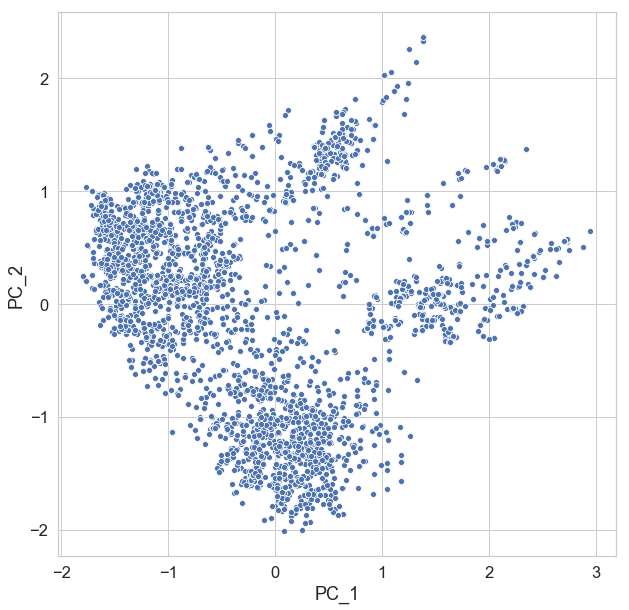

In [14]:
ax = sns.scatterplot(data=crds_df,x="PC_1",y="PC_2")

Looking at the fraction of overall variance from the two principal components

In [15]:
var = np.sum(pca.explained_variance_ratio_)
var

0.13125979454163955

13% only, not too good.

We can play around with finding out how much variance there is between choosing 2-50 principal components.

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:10<00:00,  4.39it/s]


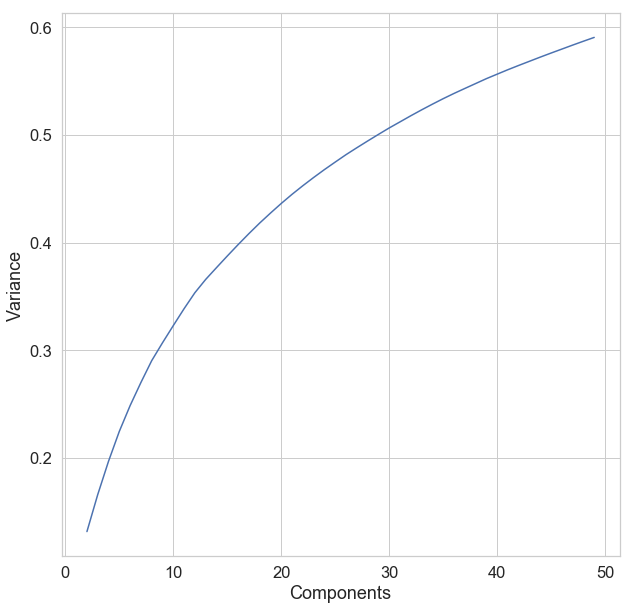

In [16]:
def evaluate_components(fp_list):
    res = []
    for n_comp in tqdm(range(2,50)):
        pca = PCA(n_components=n_comp)
        crds = pca.fit_transform(fp_list) 
        var = np.sum(pca.explained_variance_ratio_)
        res.append([n_comp,var])
    return res

# Run the function above on our fingerprint list
comp_res = evaluate_components(fp_list)

#Put these results into a dataframe
res_df = pd.DataFrame(comp_res,columns=["Components","Variance"])

#Make a line plot of the number of components vs the variance explained
ax = sns.lineplot(data=res_df,x="Components",y="Variance")

We can see that the variance increases substantially with increasing the number of components, and just begins to level off around 50.

We can also play around with how the variance is affected by the number of bits in the fingerprint. 

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:03<00:00, 14.18it/s]


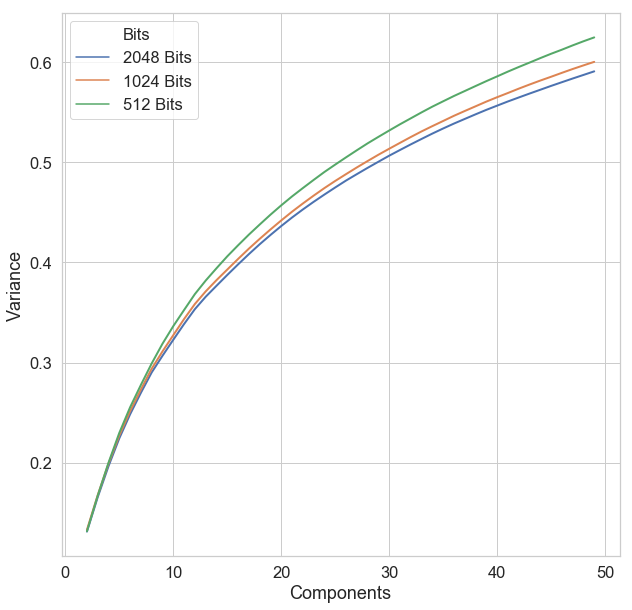

In [17]:
#Generating fingerprints with 2048, 1024, and 512 bits.
fp_2048 = fp_list
fp_1024 = fp_list_from_smiles_list(hbd.HBD_smiles,1024)
fp_512 = fp_list_from_smiles_list(hbd.HBD_smiles,512)

#Evaluate the amount of variance explained as a function of the number of principal components for each of the fingerprint lists defined above.
res_2048 = evaluate_components(fp_2048)
res_1024 = evaluate_components(fp_1024)
res_512 = evaluate_components(fp_512)

#putting this all into a single dataframe.
df_2048 = pd.DataFrame(res_2048,columns=["Components","Variance"])
df_2048['Bits'] = '2048 Bits'
df_1024 = pd.DataFrame(res_1024,columns=["Components","Variance"])
df_1024['Bits'] = '1024 Bits'
df_512 = pd.DataFrame(res_512,columns=["Components","Variance"])
df_512['Bits'] = '512 Bits'
combo_df = pd.concat([df_2048,df_1024,df_512])

#making the plot
ax = sns.lineplot(x="Components",y="Variance",hue="Bits",data=combo_df,linewidth=2)

We can see that the number of bits does not make a substantial difference in the variance. We will continue by using 50 principal components with 2048 bit fingerprints.

In [38]:
pca = PCA(n_components=50, svd_solver = 'arpack')
crds = pca.fit_transform(fp_list)

Next we will runt-distributed stochastic neighbor embedding (TSNE) on the 50 principal components in the HBD basis set.

In [39]:
from sklearn.manifold import TSNE
%time crds_embedded = TSNE(n_components=2).fit_transform(crds)

Wall time: 22.7 s


Adding the t-sne data into a dataframe

In [40]:
tsne_df = pd.DataFrame(crds_embedded,columns=["X","Y"])
tsne_df['rank'] = fp_rank

tsne_df.head()

,X,Y,rank
0,48.001087,-7.175768,1
1,54.292259,-30.070778,2
2,53.336441,-29.596867,3
3,53.332516,-29.595526,4
4,48.848129,-4.408933,5


Plotting

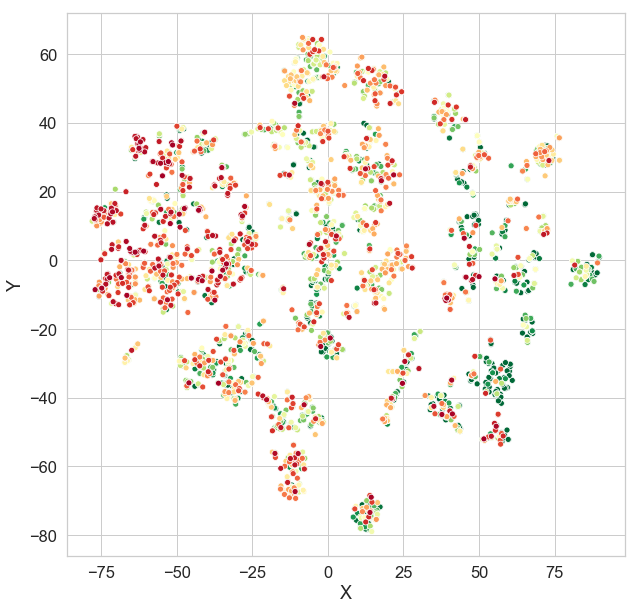

In [41]:

ax = sns.scatterplot(data=tsne_df,x="X",y="Y", hue="rank", palette = "RdYlGn_r", hue_norm = (600, 3477), legend = False)
#sns.set_palette(sns.color_palette("Paired"))

We can use modify a bit to add a colorbar to the plot showing the rank

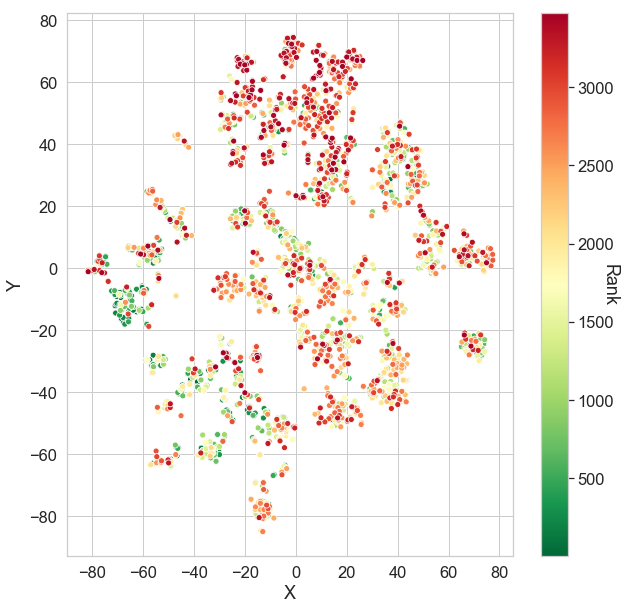

In [22]:

norm = plt.Normalize(hbd['RANK'].min(), hbd['RANK'].max())
sm = plt.cm.ScalarMappable(cmap="RdYlGn_r", norm=norm)

sm.set_array([])


ax = sns.scatterplot(data=tsne_df,x="X",y="Y", hue = 'rank', palette = "RdYlGn_r", legend = False )


cbar = plt.colorbar(sm)
cbar.set_label('Rank', rotation = 270)

#plt.savefig('HBD_basis_set.png')
plt.show()


We can repeat this process with the HBA basis set

In [23]:
hba = pd.read_csv('../pubchem/HBA_basis_set.csv')

In [24]:
hba.head(50)

,HBA_cid,HBA_smiles,Vendor Status,GHS_info,Health Score,SCALED HEALTH,HEALTH PI,Environmental Score,ENV SCALED,ENV PI,HBA_InChIKey,HBA_MolecularFormula,HBA_MolecularWeight,SCALED MW,MW PI,HBA_mp,TOTAL PI,RANK,MIN MW in set
0,75853,CCC[N+](C)(C)C.[Br-],True,"['H315', 'H319']",20,96,52.80,0,100.000000,18.000000,FCGQIZKUTMUWDC-UHFFFAOYSA-M,C6H16BrN,182.10,51.147721,13.809885,no mp data,84.609885,1,NaN
1,75854,CCCC[N+](C)(C)C.[Br-],True,"['H315', 'H319']",20,96,52.80,0,100.000000,18.000000,YGGIZRRNXQJOTI-UHFFFAOYSA-M,C7H18BrN,196.13,47.488910,12.822006,no mp data,83.622006,2,NaN
2,78872,CC[N+](C)(C)CC1=CC=CC=C1.[Cl-],True,"['H315', 'H319']",20,96,52.80,0,100.000000,18.000000,IUHDTQIYNQQIBP-UHFFFAOYSA-M,C11H18ClN,199.72,46.635289,12.591528,no mp data,83.391528,3,NaN
3,6209,C[N+](C)(C)CCO.[Cl-],True,"['H315', 'H319', 'H335']",70,86,47.30,0,100.000000,18.000000,SGMZJAMFUVOLNK-UHFFFAOYSA-M,C5H14ClNO,139.62,66.709640,18.011603,305,83.311603,4,NaN
4,71310335,C[N+](C)(C)CCO.[Cl-],True,"['H315', 'H319', 'H335']",70,86,47.30,0,100.000000,18.000000,SGMZJAMFUVOLNK-NWZHYJCUSA-M,C5H14ClNO,140.62,66.235244,17.883516,no mp data,83.183516,5,NaN
5,71309123,C[N+](C)(C)CCO.[Cl-],True,"['H315', 'H319', 'H335']",70,86,47.30,0,100.000000,18.000000,SGMZJAMFUVOLNK-LJJZSEGWSA-M,C5H14ClNO,140.62,66.235244,17.883516,no mp data,83.183516,5,NaN
6,74745,CCC[N+](CCC)(CCC)CCC.[Br-],True,Not classified as a hazardous substance,0,100,55.00,0,100.000000,18.000000,BGQMOFGZRJUORO-UHFFFAOYSA-M,C12H28BrN,266.26,34.980846,9.444828,252.2222222,82.444828,7,NaN
7,16213539,C[N+](C)(C)CCO.[Cl-],True,"['H315', 'H319', 'H335']",70,86,47.30,0,100.000000,18.000000,SGMZJAMFUVOLNK-KYRNGWDOSA-M,C5H14ClNO,148.68,62.644606,16.914044,no mp data,82.214044,8,NaN
8,82326,CC[N+](C)(CC)CC.[Cl-],True,"['H315', 'H319', 'H335']",70,86,47.30,0,100.000000,18.000000,NIUZJTWSUGSWJI-UHFFFAOYSA-M,C7H18ClN,151.68,61.405591,16.579509,no mp data,81.879509,9,NaN
9,24951,CCCCCCCCCC[N+](C)(C)C.[Cl-],True,"['H315', 'H319']",20,96,52.80,0,100.000000,18.000000,HXWGXXDEYMNGCT-UHFFFAOYSA-M,C13H30ClN,235.84,39.492877,10.663077,no mp data,81.463077,10,NaN


In [25]:
hba_fp_list = fp_list_from_smiles_list(hba.HBA_smiles)

100%|██████████████████████████████████████████████████████████████████████████████| 185/185 [00:00<00:00, 4215.88it/s]


In [26]:
len(hba_fp_list)

183

In [27]:
hba_fp_rank = list(range(1, 184))

In [28]:
#without doing tsne
hba_pca = PCA(n_components=2)
hba_crds = hba_pca.fit_transform(hba_fp_list)

hba_crds_df = pd.DataFrame(hba_crds,columns=["PC_1","PC_2"])
hba_crds_df['rank'] = hba_fp_rank
hba_crds_df.head()

,PC_1,PC_2,rank
0,-0.687701,-1.179477,1
1,-1.057079,-0.474312,2
2,2.839952,-0.039684,3
3,-0.089915,-1.974015,4
4,-0.089915,-1.974015,5


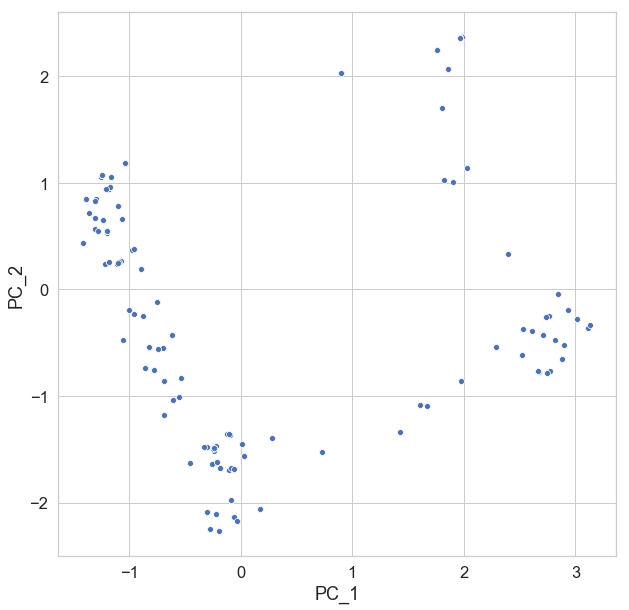

In [30]:
ax = sns.scatterplot(data=hba_crds_df,x="PC_1",y="PC_2")

In [31]:
hba_pca = PCA(n_components=50)
hba_crds = hba_pca.fit_transform(hba_fp_list)

In [32]:
%time hba_crds_embedded = TSNE(n_components=2).fit_transform(hba_crds)

Wall time: 721 ms


In [33]:
hba_tsne_df = pd.DataFrame(hba_crds_embedded,columns=["X","Y"])
hba_tsne_df['rank'] = hba_fp_rank

hba_tsne_df.head()

,X,Y,rank
0,1.333984,-1.636905,1
1,3.427286,-3.722699,2
2,-2.570815,11.216463,3
3,4.531561,3.727217,4
4,4.531560,3.727217,5


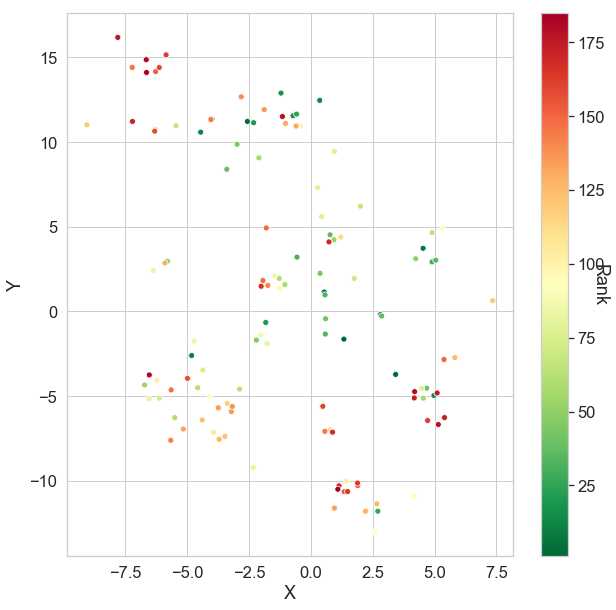

In [34]:
norm = plt.Normalize(hba['RANK'].min(), hba['RANK'].max())
sm = plt.cm.ScalarMappable(cmap="RdYlGn_r", norm=norm)

sm.set_array([])


ax = sns.scatterplot(data=hba_tsne_df,x="X",y="Y", hue = 'rank', palette = "RdYlGn_r", legend = False )


cbar = plt.colorbar(sm)
cbar.set_label('Rank', rotation = 270)

#plt.savefig('HBA_basis_set.png')
plt.show()
